# DATA SCIENCE PROJECT: Analysis of CRIME AGAINST WOMEN IN INDIA (2022)

In [ ]:
#Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Reading DataSet
data=pd.read_excel("C:/Users/HP/Desktop/PROJECT/CrimeAgainstWomen2022/Project_Dataset.xlsx")
print("Data imported succesfully")

In [ ]:
print(data.head())

In [ ]:
data.info()

In [ ]:

print(data.describe())


In [ ]:
print("\nMissing Values:\n", data.isnull().sum())


In [ ]:
print("\nDuplicate Rows:", data.duplicated().sum())

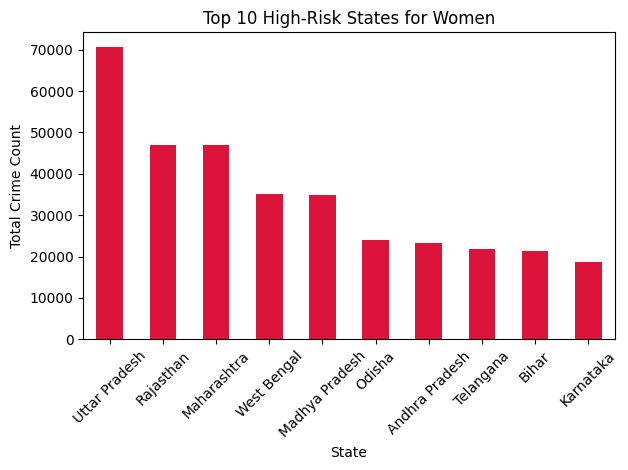

In [10]:
#objective 1: identifying high risk states for women
cols = data.columns[[3,4,5,6,7,8,9,16,19,22,28,29,30,31,32,33,34,35,36,37,38,39,41,44,45]]

statewise_crime = data.groupby("State")[cols].sum()

statewise_crime["Total_Crimes"] = statewise_crime.sum(axis=1)

top_risk_states = statewise_crime.sort_values("Total_Crimes", ascending=False)

# Plot
top_risk_states["Total_Crimes"].head(10).plot(kind='bar', color='crimson')
plt.title("Top 10 High-Risk States for Women")
plt.ylabel("Total Crime Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

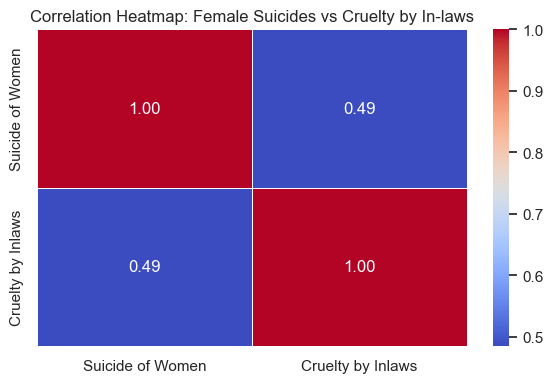

In [11]:
df_relevant = data[['Suicide of Women', 'Cruelty by Inlaws']]

# Drop any rows with missing data in these columns
df_relevant = df_relevant.dropna()

# Calculate the Pearson correlation coefficient
correlation = df_relevant.corr(method='pearson')



# Set the plot size and style
plt.figure(figsize=(6, 4))
sns.set(style='whitegrid')

# Draw the heatmap
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Female Suicides vs Cruelty by In-laws")
plt.tight_layout()
plt.show()

Top 10 Most Prevalent Crimes Against Women:

Cruelty by Inlaws                                             140019
Kidnapping & Abduction of Women                                85310
Assault on Women with Intent to Outrage her Modesty            83344
Assault on Women (18 Yrs. And above)                           80964
Protection of Children from Sexual Violence Act \n             62095
Child Rape                                                     37511
Rape                                                           31516
Rape of Women (above 18)                                       30512
Kidnapping & Abduction of Women to compel her for marriage     28656
Sexual Assault of Children                                     20494
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_9128\1476163274.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index, palette='magma')


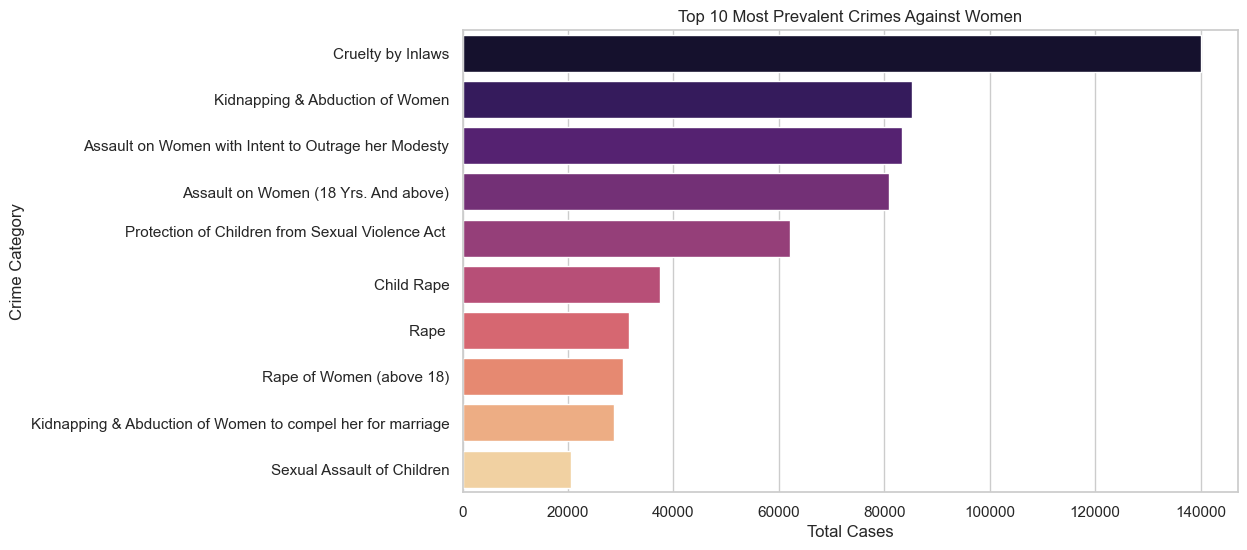

In [ ]:
crime_data = data.iloc[:, 3:]

# Sum all values per crime category
crime_totals = crime_data.sum().sort_values(ascending=False)

# Display top 10 most prevalent crimes
top_10_crimes = crime_totals.head(10)
print("Top 10 Most Prevalent Crimes Against Women:\n")
print(top_10_crimes)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index, palette='magma')
plt.title('Top 10 Most Prevalent Crimes Against Women')
plt.xlabel('Total Cases')
plt.ylabel('Crime Category')
plt.show()

<html>

In [25]:
print("\nColumns:", data.columns.tolist())


Columns: ['S. No', 'State', 'District', 'Murder with Rape', 'Dowry Deaths', 'Suicide of Women', 'Miscarriage', 'Acid Attack', 'Cruelty by Inlaws', 'Kidnapping & Abduction of Women', 'Kidnapping & Abduction for Murder', 'Kidnapping for Ransom', 'Kidnapping & Abduction of Women to compel her for marriage', 'Procuration of Minor Girls', 'Importation of Girls from Foreign Country ', 'Human Trafficking', 'Rape ', 'Rape of Women (above 18)', 'Rape of Women (Below 18)', 'Attempt to Commit Rape', 'Attempt to rape Women (above 18)', 'Attempt to rape Girls (Below 18)', 'Assault on Women with Intent to Outrage her Modesty', 'Assault on Women (18 Yrs. And above)', 'Assualt on Girls (Below 18 yrs)', 'Insult to the Modesty of Women \n', 'insult to modesty Women (18 Yrs. And above)', 'insult to modesty Girls (Below 18 yrs)', 'Dowry Prohibition Act', 'Immoral Traffic ', 'Procuring, inducing Children for the sake of prostitution (Section 5)', 'Detaining a person in premises where prostitution is carri

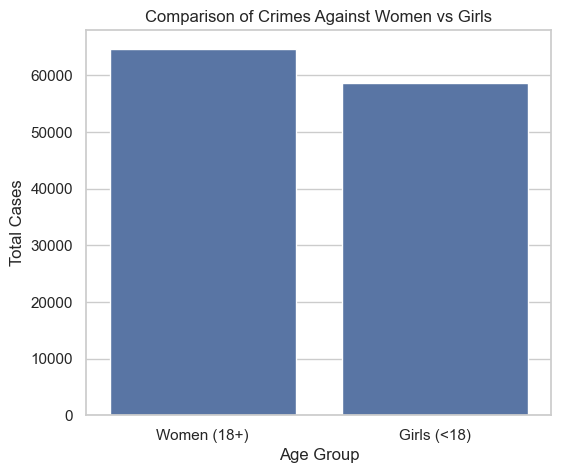

In [32]:
# Columns related to crimes against different age groups
adult_crimes = ['Rape ', 'Rape of Women (above 18)', 'Sexual Harassment']
minor_crimes = ['Child Rape', 'Sexual Assault of Children', 'Use of Child for Pornography']


# Sum total crimes in each category
adult_total = data[adult_crimes].sum().sum()
minor_total = data[minor_crimes].sum().sum()

# Prepare data for plotting
crime_comparison = pd.Series({'Women (18+)': adult_total, 'Girls (<18)': minor_total})

# Plotting
plt.figure(figsize=(6, 5))
sns.barplot(x=crime_comparison.index, y=crime_comparison.values)
plt.title('Comparison of Crimes Against Women vs Girls')
plt.ylabel('Total Cases')
plt.xlabel('Age Group')

plt.show()


🛡️ Top 10 Safest Districts (Least Crimes Reported Against Women):

             State                  District  Total_Crimes
0       Puducherry                  Karaikal             0
1  Jammu & Kashmir              CICE Kashmir             0
2  Jammu & Kashmir                CICE Jammu             0
3  Jammu & Kashmir  Special Crime Wing Jammu             0
4  Jammu & Kashmir               EOW Kashmir             0


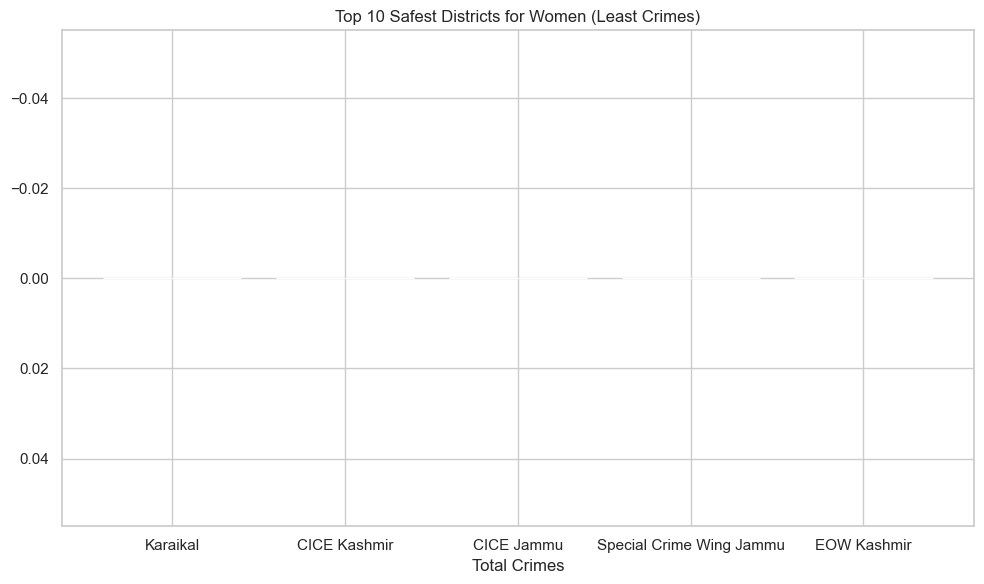

In [39]:


# Get all crime columns (assuming they start from the 4th column)
crime_columns = data.columns[3:]

# Filter only numeric crime data
crime_data = data[crime_columns].select_dtypes(include='number')

# Sum total crimes per district
data["Total_Crimes"] = crime_data.sum(axis=1)

# Sort districts by lowest total crimes
safest_districts = data.sort_values(by="Total_Crimes").reset_index(drop=True)

# Show top 10 safest districts
top_10_safest = safest_districts[["State", "District", "Total_Crimes"]].head(5)
print("🛡️ Top 10 Safest Districts (Least Crimes Reported Against Women):\n")
print(top_10_safest)

plt.figure(figsize=(10, 6))
plt.bar(top_10_safest["District"], top_10_safest["Total_Crimes"], color='green')
plt.xlabel("Total Crimes")
plt.title("Top 10 Safest Districts for Women (Least Crimes)")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

🔗 Top 10 Most Correlated Crime Pairs Among Top 15 Categories:

Assault on Women with Intent to Outrage her Modesty  Assault on Women (18 Yrs. And above)                   0.993833
Rape                                                 Rape of Women (above 18)                               0.990536
Protection of Children from Sexual Violence Act \n   Child Rape                                             0.936725
Sexual Assault of Children                           Protection of Children from Sexual Violence Act \n     0.868071
Protection of Children from Sexual Violence Act \n   Assault on Women (18 Yrs. And above)                   0.743227
                                                     Assault on Women with Intent to Outrage her Modesty    0.740205
Assault on Women (18 Yrs. And above)                 Sexual Assault of Children                             0.714785
Sexual Assault of Children                           Assault on Women with Intent to Outrage her Modesty    0.709433
C

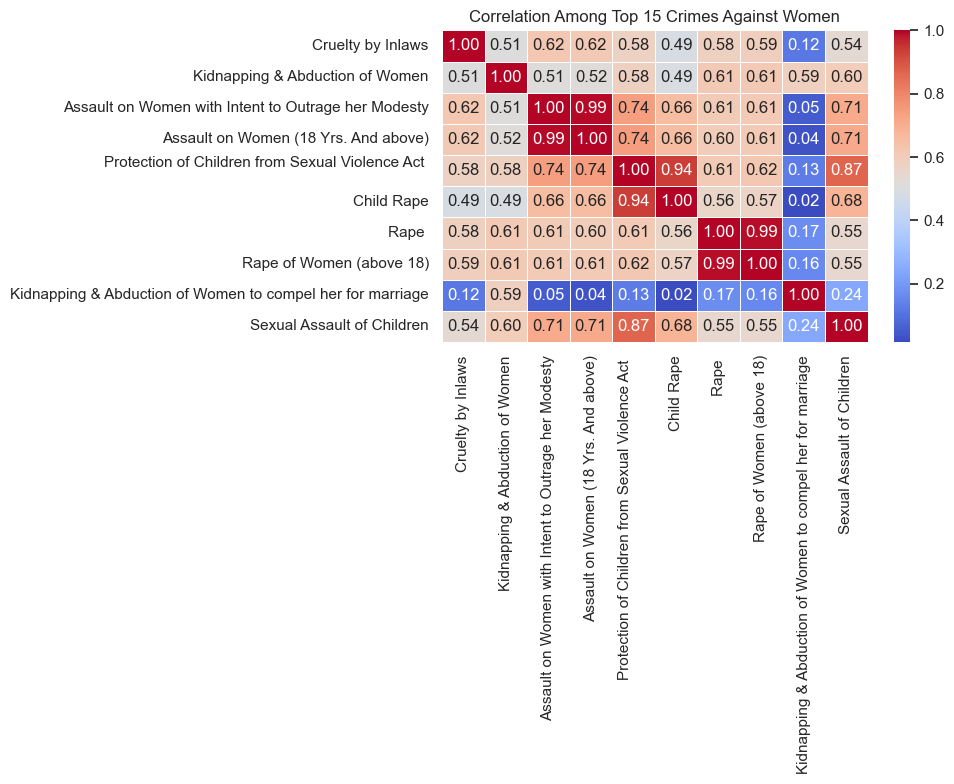

In [22]:
crime_data = data.iloc[:, 3:]

# Get top 15 crimes based on total counts
top_15_crimes = crime_data.sum().sort_values(ascending=False).head(10).index.tolist()

# Create correlation matrix for these top 15
filtered_corr = crime_data[top_15_crimes].corr()

# Get top correlated crime pairs (excluding self-correlation)
corr_unstacked = filtered_corr.unstack()
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]
corr_sorted = corr_unstacked.sort_values(ascending=False).drop_duplicates()

# Show top 10 correlated pairs
top_10_pairs = corr_sorted.head(10)
print("🔗 Top 10 Most Correlated Crime Pairs Among Top 15 Categories:\n")
print(top_10_pairs)

# Optional: Small heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Among Top 15 Crimes Against Women")
plt.tight_layout()
plt.show()
